In [1]:
import numpy as np
import pandas as pd

from lingam.utils import make_dot
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor

from lingam.utils import make_dot
from lingam import CausalBasedSimulator, CBSILiNGAM

## テストデータ

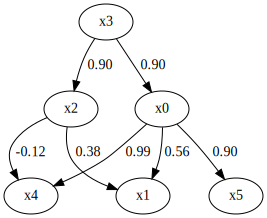

In [2]:
causal_graph = np.array([
    [ 0.000,  0.000,  0.000,  0.895,  0.000,  0.000],
    [ 0.565,  0.000,  0.377,  0.000,  0.000,  0.000],
    [ 0.000,  0.000,  0.000,  0.895,  0.000,  0.000],
    [ 0.000,  0.000,  0.000,  0.000,  0.000,  0.000],
    [ 0.991,  0.000, -0.124,  0.000,  0.000,  0.000],
    [ 0.895,  0.000,  0.000,  0.000,  0.000,  0.000]
])

generate_error = lambda p: np.random.uniform(-p, p, size=1000)

error_vars = [0.2, 0.2, 0.2, 1.0, 0.2, 0.2]
params = [0.5 * np.sqrt(12 * v) for v in error_vars]
e = np.array([generate_error(p) for p in params])

X = np.linalg.pinv(np.eye(len(causal_graph)) - causal_graph) @ e
X = X.T

display(make_dot(causal_graph))

## 

In [ ]:
# CBSImplは公開してコンストラクタにユーザ実装を追加できるようにしてもよい。その機能が不要ならばCBSImpl系を公開する必要がない。

# 本当はX[2]、X[5]はdiscreteではないが検証のため設定
m = CBSILiNGAM(X, causal_graph, is_discrete=[False, False, True, False, False, True])

# プロパティ
display(Markdown("### ■ Property"))

display(Markdown("#### endog_names_\n内生変数のリスト。"))
print(m.endog_names_)

display(Markdown("#### discrete_endog_names_\n離散な内生変数のリスト。"))
print(m.discrete_endog_names_)

display(Markdown("#### causal_order_\n訓練結果の因果順序。"))
print(m.causal_order_)

display(Markdown("#### exog_length_\n外生変数の長さ。changing_exogに指定されたデータ長のチェックに利用。"))
print(m.exog_length_)

# メソッド
display(Markdown("### ■ Method"))

# 引数は変数名。Xがnumpyの場合は自動で列番号を数字にして列名とする
display(Markdown("#### get_parent_names(var_name)\n指定変数の親変数名のリストを返す。"))
parent_names = m.get_parent_names("0")
print("parent of 0", parent_names)
parent_names = m.get_parent_names("4")
print("parent of 4", parent_names)

display(Markdown("#### get_data(var_names)\n指定変数のデータを返す"))
X0 = m.get_data("0")
plt.figure(figsize=(2, 2))
plt.scatter(X[:, 0], X0)
plt.gca().set_aspect("equal", "box")
plt.axline((0, 0), (1, 1), color="black", lw=1)
plt.xlabel("get_data")
plt.ylabel("true data")
plt.show()

display(Markdown("#### get_causal_order(changing_edges=None)\n因果順序を返す。changing_edgesでエッジを付け替えたうえでの因果順序を返す。シミュレート時、エッジ増減後の因果順序を知るために使用する。"))
co = m.get_causal_order()
print("そのままの場合")
print(co)

print("3->0を切って、2->0を追加")
# キーは対象の変数、値はその変数の親ノード名。
changing_edges = {"0": ["2"]}
co = m.get_causal_order(changing_edges=changing_edges)
print(co)

display(Markdown("#### Others \n因果探索アルゴリズムごとに誤差項の取り扱い方が変わる場合(未観測共通原因を持つ変数同士の誤差項はセットで並び替えなど)、set_exog_data(var_name, e), get_exog_data(is_shuffle)を実装します。"))
